In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import calendar

disney_file = "Resources/DisneyHistoricalStockPriceData.csv"
NYT_file = "Resources/NYT_Article_Pull.csv"

disney_df = pd.read_csv(disney_file, encoding="ISO-8859-1")
nyt_df = pd.read_csv(NYT_file, encoding="ISO-8859-1")

In [3]:
disney_df.columns = ["date","open","high","low","close","volume"]
disney_df = disney_df[disney_df["open"] != "Open"]

In [4]:
disney_df[["Year","Month","Day"]] = disney_df.date.str.split("-",expand=True)
disney_df["date"] = pd.to_datetime(disney_df["date"])
disney_df["Day of Week"] = disney_df["date"].dt.dayofweek
disney_df["Week"] = disney_df["date"] -  pd.to_timedelta(disney_df["Day of Week"], unit='d')

In [5]:
disney_df["Year"] = pd.to_numeric(disney_df["Year"])
disney_df = disney_df[disney_df["Year"] >= 1980]
disney_df = disney_df[["date","open","close","Day of Week","Week"]]

In [6]:
disney_df["close"] = disney_df["close"].shift(3)

In [7]:
disney_df = disney_df.dropna(how='any')

In [8]:
disney_df["Day of Week"] = pd.to_numeric(disney_df["Day of Week"])
disney_df = disney_df[disney_df["Day of Week"] == 0]

In [9]:
disney_df["close"] = pd.to_numeric(disney_df["close"])
disney_df["open"] = pd.to_numeric(disney_df["open"])
disney_df["Week Change"] = disney_df["close"] - disney_df["open"]

In [10]:
disney_df = disney_df[["Week","Week Change"]]
disney_df.head()

,Week,Week Change
4,2020-06-15,6.29
9,2020-06-08,-12.46
14,2020-06-01,6.43
19,2020-05-25,-1.27
24,2020-05-18,3.36


In [11]:
nyt_df = nyt_df[["URL","3","4","5","6"]]

In [12]:
nyt_df["length"] = nyt_df["4"].str.len()
nyt_df["length"] = pd.to_numeric(nyt_df["length"])
nyt_df = nyt_df[nyt_df["length"] == 4]

In [13]:
nyt_df["Date"] = nyt_df["4"] + "-" + nyt_df["5"] + "-" + nyt_df["6"]
nyt_df["Date"] = pd.to_datetime(nyt_df["Date"])
nyt_df["Day of Week"] = nyt_df["Date"].dt.dayofweek
nyt_df["Week"] = nyt_df["Date"] -  pd.to_timedelta(nyt_df["Day of Week"], unit='d')
nyt_df = nyt_df[["Week","URL"]]

In [14]:
nyt_df_grouped = nyt_df.groupby(["Week"])
url_count = nyt_df_grouped.count()


In [15]:
merge_df = pd.merge(disney_df, url_count, on="Week")
merge_df

,Week,Week Change,URL
0,2020-06-15,6.29,3
1,2020-06-08,-12.46,3
2,2020-06-01,6.43,3
3,2020-05-25,-1.27,1
4,2020-05-18,3.36,3
...,...,...,...
325,1984-04-09,-0.03,1
326,1984-04-02,0.04,1
327,1984-03-26,0.02,1
328,1983-09-19,-0.02,1


In [16]:
print(merge_df.head())

        Week  Week Change  URL
0 2020-06-15         6.29    3
1 2020-06-08       -12.46    3
2 2020-06-01         6.43    3
3 2020-05-25        -1.27    1
4 2020-05-18         3.36    3


In [20]:
merge_df = merge_df.set_index("Week")

<IPython.core.display.Javascript object>


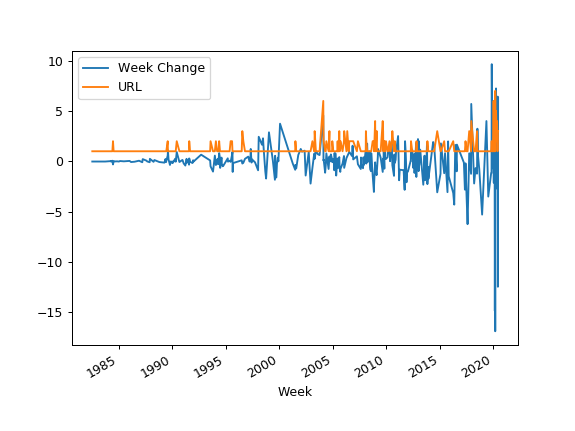

In [22]:
merge_df.plot()

<IPython.core.display.Javascript object>


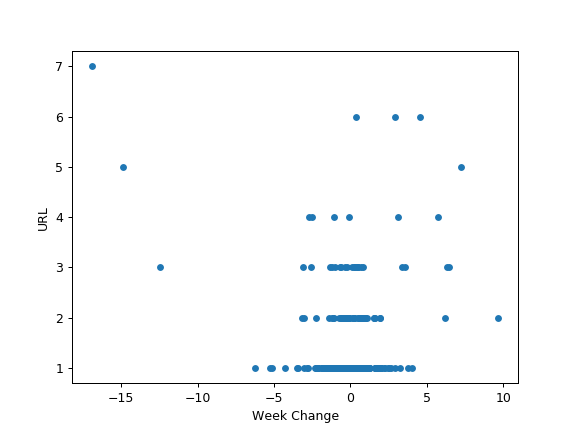

In [24]:
merge_df.plot.scatter("Week Change","URL")